In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='white', color_codes=True)

In [ ]:
data = pd.read_csv('/content/ortho_knnnb.csv')
data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [ ]:
data= data.replace({'Abnormal':0,'Normal':1})
data['symptom_class'] = data['class']

data = data.drop(['class'],axis =1)

TypeError: ignored

In [ ]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


In [ ]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.322581
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.468220
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.000000
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.000000
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.000000
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,1.000000
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,1.000000


<function matplotlib.pyplot.show>

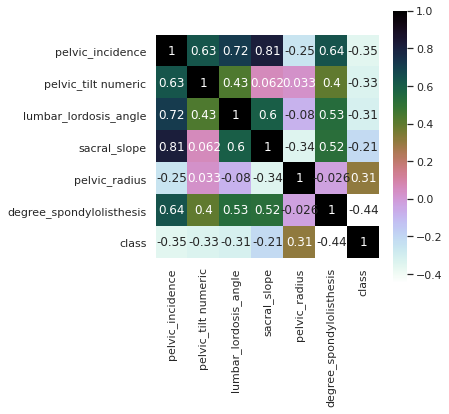

In [ ]:
corr = data.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True, cmap='cubehelix_r', square=True)
plt.show

In [ ]:
x = data.iloc[:,:-1]
display(x)
y = data.iloc[:,-1]
display(y)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750


0      0
1      0
2      0
3      0
4      0
      ..
305    1
306    1
307    1
308    1
309    1
Name: class, Length: 310, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.25)

In [ ]:
print('Dimension of train_x dataframe:',train_x.shape)
print('Dimension of train_y dataframe:',train_y.shape)
print('Dimension of val_x dataframe:',test_x.shape)
print('Dimension of val_y dataframe:',test_y.shape)

Dimension of train_x dataframe: (232, 6)
Dimension of train_y dataframe: (232,)
Dimension of val_x dataframe: (78, 6)
Dimension of val_y dataframe: (78,)


In [ ]:
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(train_x, train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = nvclassifier.predict(test_x)
print(y_pred)

[1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1
 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1
 0 1 1 0]


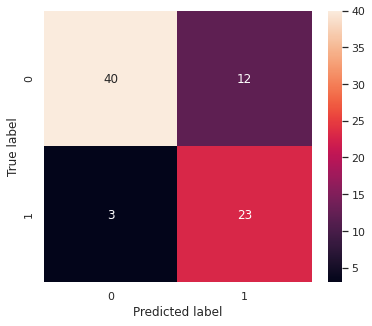

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred += cm[row,c]
        else:
            falsePred += cm[row,c]
print("*"*70)
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print("*"*70)
acc = corrPred/cm.sum()
print ('Accuracy of the Naive Bayes Clasification is {}% '.format(round(acc*100,2)))
print("*"*70)

**********************************************************************
Correct predictions:  63
False predictions 15
**********************************************************************
Accuracy of the Naive Bayes Clasification is 80.77% 
**********************************************************************


In [ ]:
from sklearn.metrics import accuracy_score

print('The accuracy of the NB is {}%'.format(round(accuracy_score(y_pred,test_y)*100,2)))

The accuracy of the NB is 80.77%


In [ ]:
nvclassifier.predict_proba(test_x)[:10]

array([[3.07830062e-02, 9.69216994e-01],
       [1.00000000e+00, 2.68567770e-21],
       [1.00000000e+00, 9.67902446e-18],
       [9.99914190e-01, 8.58097834e-05],
       [1.63738936e-01, 8.36261064e-01],
       [4.52170574e-02, 9.54782943e-01],
       [8.56774542e-02, 9.14322546e-01],
       [1.02378986e-01, 8.97621014e-01],
       [1.20779072e-01, 8.79220928e-01],
       [1.82033588e-02, 9.81796641e-01]])